<a href="https://colab.research.google.com/github/ASHIKAMOHAN/Sales_Forecasting/blob/main/Copy_of_22063061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
import math

In [ ]:

# # Read in the accident data. Each unique accident in the accident data can have multiple casualties and vehicles
# # uk_data = pd.read_csv('dftRoadSafety_Accidents_2016.csv', index_col=False)
# uk_data = pd.read_csv('dftRoadSafety_Accidents_2016.csv',
#                             dtype={"Did_Police_Officer_Attend_Scene_of_Accident": int,
#                                    "Pedestrian_Crossing-Human_Control": str},index_col=False)

import pandas as pd

# Read in the accident data
uk_data = pd.read_csv('/content/drive/MyDrive/ML2/archive (5)/dftRoadSafety_Accidents_2016.csv',
                      dtype={"Did_Police_Officer_Attend_Scene_of_Accident": int,
                             "Pedestrian_Crossing-Human_Control": str},
                      index_col=False)

# Convert the 'Accident_Index' column to string format
uk_data['Accident_Index'] = uk_data['Accident_Index'].astype(str)



<ipython-input-4-c422854b6629>:10: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  uk_data = pd.read_csv('/content/drive/MyDrive/ML2/archive (5)/dftRoadSafety_Accidents_2016.csv',


In [ ]:
uk_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,...,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,...,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,...,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01002583


In [ ]:
uk_data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,136614.000000,1.366140e+05,136614.000000,136614.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,...,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000
mean,448699.363169,2.883354e+05,-1.304881,52.482399,29.860402,2.816170,1.848179,1.327644,4.115890,342.786680,...,2.647712,321.590678,0.824375,1.983509,1.553099,1.291697,0.085338,0.055409,1.352508,1.253965
std,95230.253169,1.570588e+05,1.398947,1.414390,25.252440,0.418152,0.710117,0.789296,1.917292,258.403794,...,3.226569,1202.759007,1.927500,1.676938,1.690541,0.588247,0.654925,0.557042,0.477860,0.464658
min,76702.000000,1.107500e+04,-7.389809,49.919716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,386355.750000,1.764248e+05,-2.204357,51.473779,6.000000,3.000000,1.000000,1.000000,2.000000,102.000000,...,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,454126.000000,2.374855e+05,-1.201205,52.025165,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,...,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,527660.000000,3.897438e+05,-0.159708,53.401675,45.000000,3.000000,2.000000,1.000000,6.000000,516.000000,...,6.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,655256.000000,1.178623e+06,1.757858,60.490191,98.000000,3.000000,16.000000,58.000000,7.000000,941.000000,...,6.000000,9999.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


In [ ]:
uk_data.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             7
Location_Northing_OSGR                            7
Longitude                                         7
Latitude                                          7
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              2
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                      37
Junction_Detail                                   0
Junction_Con

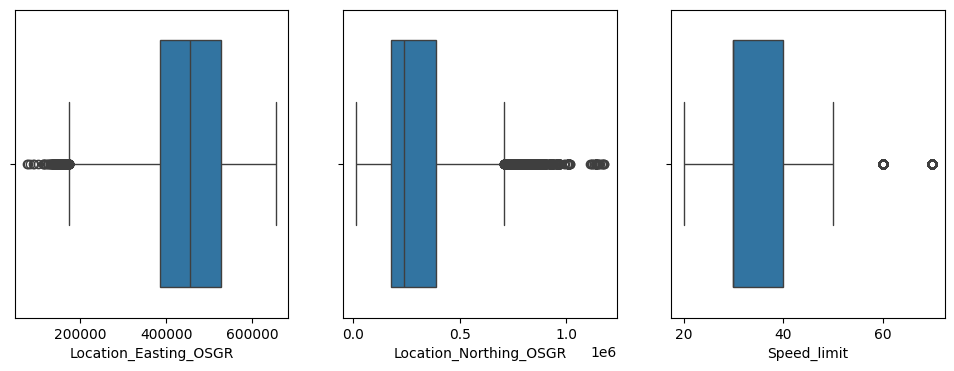

In [ ]:
# Plotting Box Plot of :-
# i) Location_Easting_OSGR
# ii) Location_Northing_OSGR
# iii) Speed_limit
# To check how data is distributed
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Location_Easting_OSGR", "Location_Northing_OSGR", "Speed_limit"]):
    sns.boxplot(x=uk_data[col], ax=ax[axid])

In [ ]:
uk_data['Time']

0         02:30
1         00:37
2         01:25
3         09:15
4         07:53
          ...  
136616    06:45
136617    16:45
136618    07:10
136619    20:00
136620    12:30
Name: Time, Length: 136621, dtype: object

In [ ]:
uk_data['Date']

0         01/11/2016
1         01/11/2016
2         01/11/2016
3         01/11/2016
4         01/11/2016
             ...    
136616    28/10/2016
136617    01/11/2016
136618    27/10/2016
136619    29/10/2016
136620    25/12/2016
Name: Date, Length: 136621, dtype: object

In [ ]:
# Here we are extracting Month from the feature 'Date' in the dataframe
def month_date(date):
    month = datetime.strptime(date, '%d/%m/%Y')
    return int(datetime.strftime(month, '%m'))

uk_data['Month'] = uk_data['Date'].apply(month_date)

In [ ]:
uk_data['Month']

0         11
1         11
2         11
3         11
4         11
          ..
136616    10
136617    11
136618    10
136619    10
136620    12
Name: Month, Length: 136621, dtype: int64

In [ ]:
# We are extracting hour from the feature 'Time' in the dataframe and we are replacing NaN values with 0
def hour_time(time):
    try:
        hour = datetime.strptime(time, '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

uk_data['Hour'] = uk_data['Time'].apply(hour_time)

In [ ]:
uk_data['Hour']

0          2
1          0
2          1
3          9
4          7
          ..
136616     6
136617    16
136618     7
136619    20
136620    12
Name: Hour, Length: 136621, dtype: int64

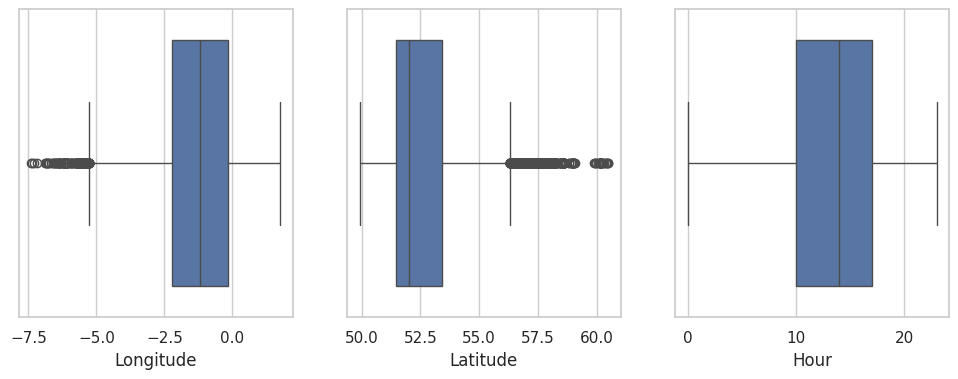

In [ ]:
# Boxplots of the features:-
# i) Longitude
# ii) Latutude
# iii) Hour
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Longitude", "Latitude", "Hour"]):
    sns.boxplot(x=uk_data[col], ax=ax[axid])

In [ ]:
# Creating another Dataframe of Cas.csv
# We are also filtering data by including only those columns where casualty type = 1, because casualty type = 1 refers to casualty occuring by cycles
cycle_data = pd.read_csv('/content/drive/MyDrive/ML2/archive (5)/Cas.csv')
cycle_data = cycle_data[cycle_data['Casualty_Type']==1]

In [ ]:
cycle_data

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
4,2016010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6
17,2016010000046,1,1,1,1,20,4,3,0,0,0,0,0,1,1,2
29,2016010000058,1,1,1,1,23,5,3,0,0,0,0,0,1,1,2
35,2016010000069,2,1,1,1,29,6,3,0,0,0,0,0,1,1,5
36,2016010000072,2,1,1,1,24,5,3,0,0,0,0,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181274,2016984106016,2,1,1,2,81,11,3,0,0,0,0,0,1,3,-1
181309,2016984117016,2,1,1,1,17,4,3,0,0,0,0,0,1,2,-1
181343,2016984124316,2,1,1,2,60,9,3,0,0,0,0,0,1,1,7
181345,2016984124616,2,1,1,2,25,5,3,0,0,0,0,0,1,2,-1


In [ ]:
# We are merging both dataframe into one
# Here we used Accident_Index as primary index to join table and we have used left join to merge both dataframes
merge_data = pd.merge(uk_data, cycle_data, on='Accident_Index', how='left')
merge_data

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136829,2016984130916,319273.0,574564.0,-3.265390,55.058998,98,3,2,1,28/10/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136830,2016984131116,316143.0,568615.0,-3.312631,55.005033,98,3,2,2,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136831,2016984131216,322903.0,573365.0,-3.208249,55.048803,98,3,1,1,27/10/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136832,2016984131316,318673.0,566850.0,-3.272584,54.989597,98,3,1,3,29/10/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking null values of all features in new merged dataframe
merge_data.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                               7
Location_Northing_OSGR                              7
Longitude                                           7
Latitude                                            7
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                                2
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                        37
Junction_Detail             

In [ ]:
# we only need those features which are related to cycle accidents
# Thus we are dropping all unnecessary columns from our merged dataframe
merge_data = merge_data.drop(['1st_Road_Class','2nd_Road_Class','Age_of_Casualty',
                             'Bus_or_Coach_Passenger','Car_Passenger','Carriageway_Hazards',
                             'Casualty_Class','Casualty_IMD_Decile','Junction_Control',
                              'Junction_Detail','Local_Authority_(Highway)',
                             'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities',
                             'Pedestrian_Road_Maintenance_Worker','Pedestrian_Movement',
                             'Pedestrian_Location','Police_Force','Did_Police_Officer_Attend_Scene_of_Accident',
                             'Special_Conditions_at_Site','Vehicle_Reference','LSOA_of_Accident_Location',
                             'Number_of_Vehicles','Date','Time','Casualty_Reference'],axis=1)

In [ ]:
merge_data.isnull().sum()

Accident_Index                     0
Location_Easting_OSGR              7
Location_Northing_OSGR             7
Longitude                          7
Latitude                           7
Accident_Severity                  0
Number_of_Casualties               0
Day_of_Week                        0
Local_Authority_(District)         0
1st_Road_Number                    0
Road_Type                          0
Speed_limit                       37
2nd_Road_Number                    0
Light_Conditions                   0
Weather_Conditions                 0
Road_Surface_Conditions            0
Urban_or_Rural_Area                0
Month                              0
Hour                               0
Sex_of_Casualty               118357
Age_Band_of_Casualty          118357
Casualty_Severity             118357
Casualty_Type                 118357
Casualty_Home_Area_Type       118357
dtype: int64

In [ ]:
# Filling null values with median of their respective column
merge_data['Location_Easting_OSGR'].fillna(value = merge_data['Location_Easting_OSGR'].median(),inplace=True)
merge_data['Location_Northing_OSGR'].fillna(value = merge_data['Location_Northing_OSGR'].median(),inplace=True)
merge_data['Longitude'].fillna(value = merge_data['Longitude'].median(),inplace=True)
merge_data['Latitude'].fillna(value = merge_data['Latitude'].median(),inplace=True)
merge_data['Speed_limit'].fillna(value = merge_data['Speed_limit'].median(),inplace=True)

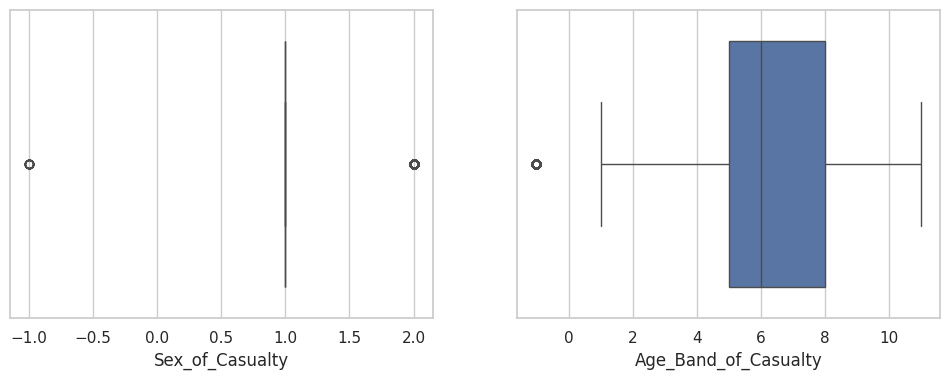

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(['Sex_of_Casualty','Age_Band_of_Casualty']):
    sns.boxplot(x=merge_data[col], ax=ax[axid])

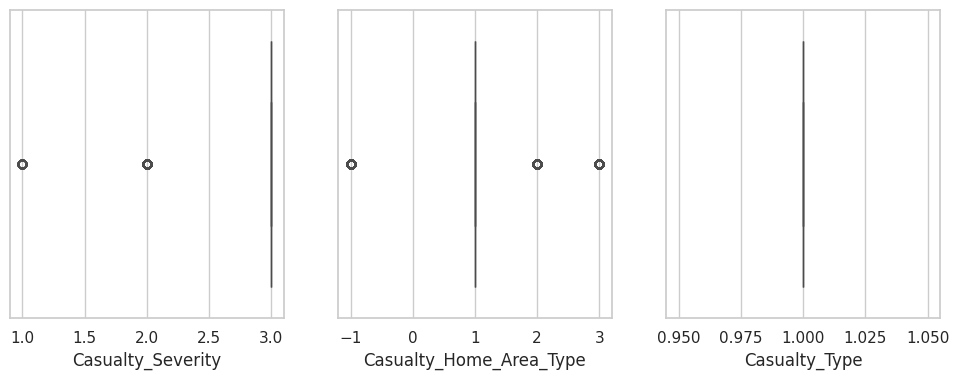

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(['Casualty_Severity','Casualty_Home_Area_Type','Casualty_Type']):
    sns.boxplot(x=merge_data[col], ax=ax[axid])

<Axes: >

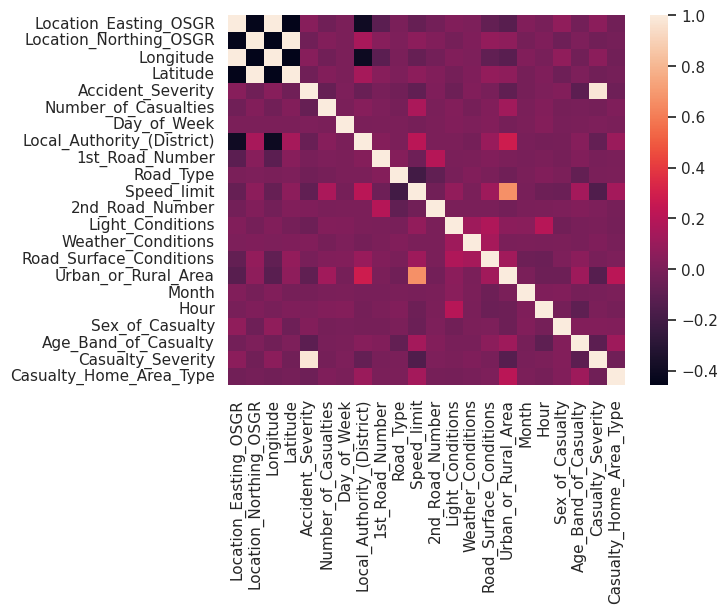

In [ ]:
# Plotting Correlation Heatmap to understand how each feature is related to another features

# Drop the 'Accident_Index' and 'Casualty_Type' columns before generating the correlation heatmap
merge_data_without_index = merge_data.drop(columns=['Accident_Index', 'Casualty_Type'])

# Plot the correlation heatmap without the 'Accident_Index' column
sns.heatmap(merge_data_without_index.corr())



In [ ]:
# We can see that Location_Easting_OSGR is completely correlated to Longitude and similarly Location_Northing_OSGR is completely correlated to Latitude, so we can drop Longitude and Latitude or vice versa.
merge_data = merge_data.drop(['Longitude','Latitude','Accident_Index'],axis=1)

In [ ]:
# We are filling all null values with 0
merge_data.fillna(0, inplace=True)
merge_data.isnull().sum()

Location_Easting_OSGR         0
Location_Northing_OSGR        0
Accident_Severity             0
Number_of_Casualties          0
Day_of_Week                   0
Local_Authority_(District)    0
1st_Road_Number               0
Road_Type                     0
Speed_limit                   0
2nd_Road_Number               0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Urban_or_Rural_Area           0
Month                         0
Hour                          0
Sex_of_Casualty               0
Age_Band_of_Casualty          0
Casualty_Severity             0
Casualty_Type                 0
Casualty_Home_Area_Type       0
dtype: int64

In [ ]:
merge_data

,Location_Easting_OSGR,Location_Northing_OSGR,Accident_Severity,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Number,...,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month,Hour,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Casualty_Type,Casualty_Home_Area_Type
0,519310.0,188730.0,3,1,3,28,4006,6,30.0,0,...,1,1,1,11,2,0.0,0.0,0.0,0.0,0.0
1,551920.0,174560.0,3,1,3,18,207,6,30.0,0,...,1,1,1,11,0,0.0,0.0,0.0,0.0,0.0
2,505930.0,183850.0,3,1,3,26,4020,1,30.0,4020,...,1,1,1,11,1,0.0,0.0,0.0,0.0,0.0
3,527770.0,168930.0,3,1,3,22,217,6,30.0,217,...,1,1,1,11,9,0.0,0.0,0.0,0.0,0.0
4,510740.0,177230.0,3,1,3,25,312,3,40.0,0,...,1,1,1,11,7,1.0,6.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136829,319273.0,574564.0,3,1,6,917,7076,6,30.0,725,...,1,2,2,10,6,0.0,0.0,0.0,0.0,0.0
136830,316143.0,568615.0,3,2,3,917,7020,6,60.0,49,...,1,1,2,11,16,0.0,0.0,0.0,0.0,0.0
136831,322903.0,573365.0,3,1,5,917,74,3,70.0,0,...,1,2,2,10,7,0.0,0.0,0.0,0.0,0.0
136832,318673.0,566850.0,3,3,7,917,724,6,40.0,0,...,1,1,2,10,20,0.0,0.0,0.0,0.0,0.0


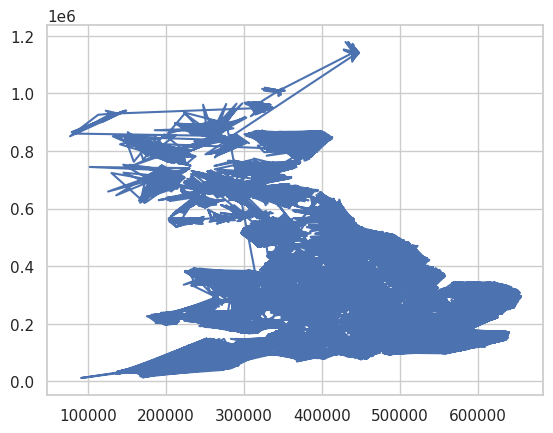

In [ ]:
# Plotting the coordinates of all the cycle accidents
plt.plot(merge_data['Location_Easting_OSGR'], merge_data['Location_Northing_OSGR'])

In [ ]:
# We are considering Casualty_Type as our dependent feature and we will predict its value.
# Here if Casualty_Type == 1, it means Accident by cycle
# if Casualty_Type == 0, it means Accident not by cycle
X = merge_data.drop('Casualty_Type',axis=1)
y = merge_data['Casualty_Type']

In [ ]:
X

,Location_Easting_OSGR,Location_Northing_OSGR,Accident_Severity,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Month,Hour,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Casualty_Home_Area_Type
0,519310.0,188730.0,3,1,3,28,4006,6,30.0,0,5,1,1,1,11,2,0.0,0.0,0.0,0.0
1,551920.0,174560.0,3,1,3,18,207,6,30.0,0,4,1,1,1,11,0,0.0,0.0,0.0,0.0
2,505930.0,183850.0,3,1,3,26,4020,1,30.0,4020,4,1,1,1,11,1,0.0,0.0,0.0,0.0
3,527770.0,168930.0,3,1,3,22,217,6,30.0,217,1,1,1,1,11,9,0.0,0.0,0.0,0.0
4,510740.0,177230.0,3,1,3,25,312,3,40.0,0,1,1,1,1,11,7,1.0,6.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136829,319273.0,574564.0,3,1,6,917,7076,6,30.0,725,4,1,2,2,10,6,0.0,0.0,0.0,0.0
136830,316143.0,568615.0,3,2,3,917,7020,6,60.0,49,1,1,1,2,11,16,0.0,0.0,0.0,0.0
136831,322903.0,573365.0,3,1,5,917,74,3,70.0,0,6,1,2,2,10,7,0.0,0.0,0.0,0.0
136832,318673.0,566850.0,3,3,7,917,724,6,40.0,0,4,1,1,2,10,20,0.0,0.0,0.0,0.0


In [ ]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
136829    0.0
136830    0.0
136831    0.0
136832    0.0
136833    0.0
Name: Casualty_Type, Length: 136834, dtype: float64

In [ ]:
# We are splitting our data into train and test by keeping train size = 80% and test size = 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [ ]:
# Using standard scaling on X_train and applying it to X_test¶
# Standard scaling is just scaling data in such a way that it mean becomes 0 and standard deviation = 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# I have used three models:-
# i) SGD Classifer
# ii) Random Forest Classifer
# iii) XGB Classifer
# I have also passed lists of hyperparamters in all models so that by using GridSearchCV we can find best model with best paramters
model_dict = {
    'SGDClassifier': {"model": SGDClassifier(max_iter=10000), "params": {'loss' : ['squared_hinge','log'],
                                                          'alpha' : [0.001,0.01],
                                                          'penalty' : ['l2','l1']}},
    'RandomForestClassifier': {"model": RandomForestClassifier(random_state=11),
                     "params": {'criterion' : ['gini', 'entropy'],
                                 'max_features' : ['auto','sqrt'],
                                 'n_estimators' : list(range(5,15,5)),
                                 'max_depth' : list(range(3,12,2))
                                 }},
    'XGBClassifier': {"model": XGBClassifier(), "params": {'n_estimators': [100,500,600],
                                                         'learning_rate': [0.01, 0.02, 0.03],
                                                         'max_depth': [3,5,7],
                                                         'booster' : ['gbtree']
                                                         }}
}

In [ ]:
# We are comparing all three based on two metrics:-
# i) RMSE(Root Mean Squared Error)
# ii) MAE(Mean Absolute Error)
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=-1, verbose=0)
        classifier.fit(X_train, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)
        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)

    y_predicted = best_model.predict(X_test)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

SGDClassifier 0.010470056250397432 {'alpha': 0.001, 'loss': 'squared_hinge', 'penalty': 'l1'}
RandomForestClassifier 0.0 {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 5}
XGBClassifier 0.0 {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best model:  XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_

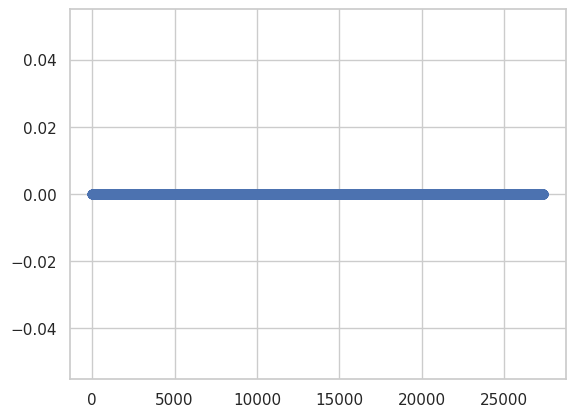

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    model_results = eval_models()

In [ ]:
# These are results and also giving us best parameters
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
SGDClassifier,0.01047,0.013517,0.00011,0.000183,"{'alpha': 0.001, 'loss': 'squared_hinge', 'pen..."
RandomForestClassifier,0.0,0.0,0.0,0.0,"{'criterion': 'gini', 'max_depth': 3, 'max_fea..."
XGBClassifier,0.0,0.0,0.0,0.0,"{'booster': 'gbtree', 'learning_rate': 0.01, '..."


In [ ]:
# # Just trying best parameters in models and trying to find best score
sgd_parameters = {   'alpha': [0.001], 'loss': ['squared_hinge'], 'penalty': ['l1']
                 }

sgd_model = GridSearchCV(SGDClassifier(), sgd_parameters, cv=2,n_jobs=-1)
sgd_model.fit(X_train, y_train)
sgd_predict = sgd_model.predict(X_test)
sgd_score = sgd_model.best_score_
sgd_score




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9998812424985922

In [ ]:
xgb_parameters = {   'booster': ['gbtree'], 'learning_rate': [0.01], 'max_depth': [3], 'n_estimators': [100]
                 }
xgb_model = GridSearchCV(XGBClassifier(), xgb_parameters, cv=2,n_jobs=-1)
xgb_model.fit(X_train, y_train)
xgb_predict = xgb_model.predict(X_test)
xgb_score = xgb_model.best_score_
xgb_score

1.0

In [ ]:


rf_parameters = {
    'criterion': ['gini'],
    'max_depth': [3],
    'max_features': ['sqrt'],
    'n_estimators': [5]
}

rf_model = GridSearchCV(RandomForestClassifier(), rf_parameters, cv=2,n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)
rf_score = rf_model.best_score_
rf_score

0.9999908649102934